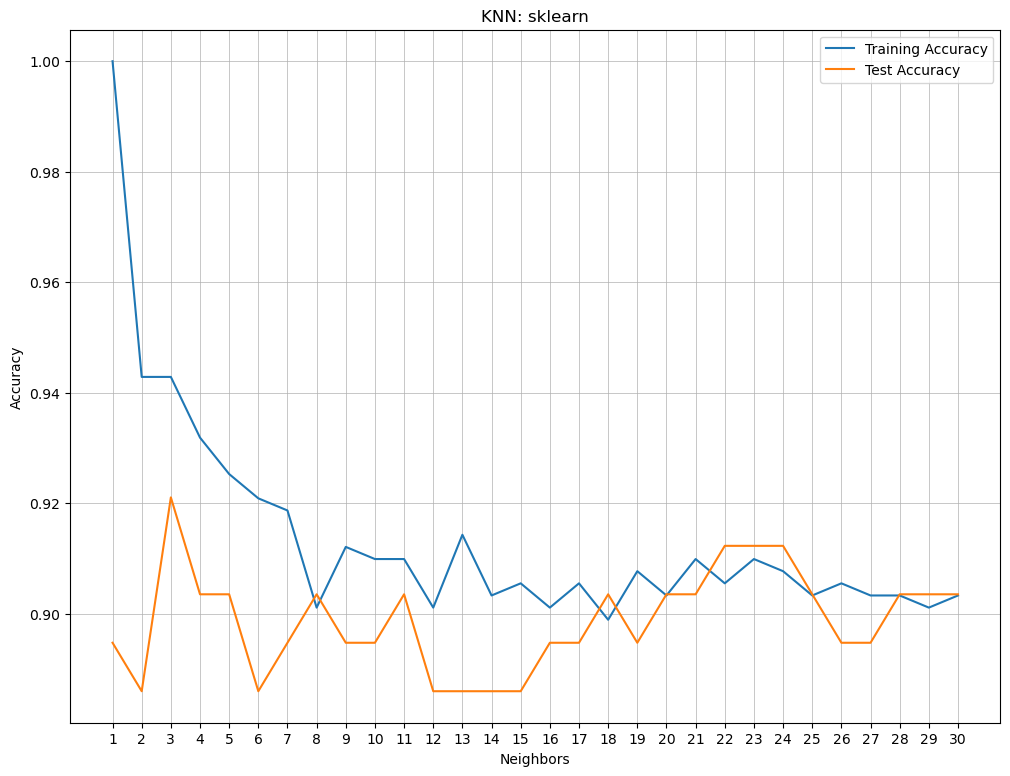

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Breast_cancer_data.csv")

#training and testing data
from sklearn.model_selection import train_test_split
X = df.drop("diagnosis", axis=1)
y = df.diagnosis
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True, random_state=21)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

#KNN model
from sklearn.neighbors import KNeighborsClassifier
train_accuracies = []
test_accuracies = []
neighbors = range(1, 31)
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)

    train_accuracies.append(knn.score(X_train, y_train))
    test_accuracies.append(knn.score(X_test, y_test))
plt.figure(figsize=(12, 9))
plt.plot(neighbors, train_accuracies, label="Training Accuracy")
plt.plot(neighbors, test_accuracies, label = "Test Accuracy")
plt.title("KNN: sklearn")
plt.legend()
plt.xlabel("Neighbors")
plt.ylabel("Accuracy")
plt.grid(True, which='both', axis='both', linestyle='-', linewidth=0.5)
plt.xticks(ticks=neighbors)
plt.show()   

In [6]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
clf = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=3))
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.945054945054945

In [7]:
clf.score(X_test, y_test)

0.8859649122807017

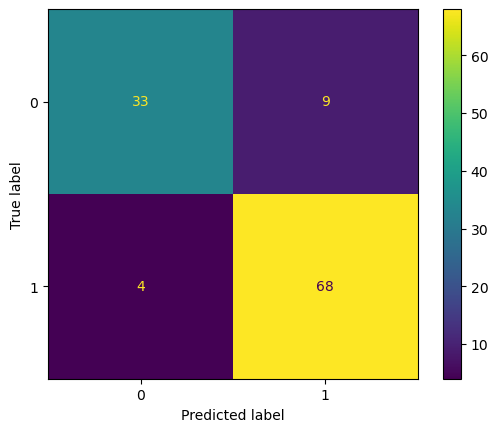

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    clf, X_test, y_test, cmap='viridis')

In [10]:
#Predicting Results
y_pred = clf.predict(X_test)
#Calculating Resulta
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred))
print("accuracy score: {0}%".format(accuracy_score(y_test, y_pred) * 100))

Confusion Matrix: 
 [[33  9]
 [ 4 68]]
accuracy score: 88.59649122807018%


In [11]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
rmacc = accuracy_score(y_test, y_pred)
print('Accuracy Score: ' + str(rmacc))
print('Precision Score: ' + str(precision_score(y_test, y_pred)))
print('Recall Score: ' + str(recall_score(y_test, y_pred)))
print('F1 Score: ' + str(f1_score(y_test, y_pred)))

Accuracy Score: 0.8859649122807017
Precision Score: 0.8831168831168831
Recall Score: 0.9444444444444444
F1 Score: 0.912751677852349
